In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**[Data downloaded from the Public Health Agency of Canada](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1310078101)**

In [2]:
data = pd.read_csv("../13100781.csv")
data.describe()

,REF_DATE,Case identifier number,UOM_ID,SCALAR_ID,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
count,3532055.0,3.532055e+06,3532055.0,3532055.0,3.532055e+06,0.0,0.0,0.0,3532055.0
mean,2020.0,6.089800e+04,223.0,0.0,1.516725e+01,NaN,NaN,NaN,0.0
std,0.0,3.515919e+04,0.0,0.0,2.517655e+01,NaN,NaN,NaN,0.0
min,2020.0,1.000000e+00,223.0,0.0,0.000000e+00,NaN,NaN,NaN,0.0
25%,2020.0,3.044900e+04,223.0,0.0,3.000000e+00,NaN,NaN,NaN,0.0
50%,2020.0,6.089800e+04,223.0,0.0,9.000000e+00,NaN,NaN,NaN,0.0
75%,2020.0,9.134700e+04,223.0,0.0,9.000000e+00,NaN,NaN,NaN,0.0
max,2020.0,1.217950e+05,223.0,0.0,9.900000e+01,NaN,NaN,NaN,0.0


In [3]:
# what do the column entries look like?
data.head()

,REF_DATE,GEO,DGUID,Case identifier number,Case information,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2020,Canada,2016A000011124,1,Region,Number,223,units,0,v1158536291,1.1.1,2,NaN,NaN,NaN,0
1,2020,Canada,2016A000011124,1,Episode week,Number,223,units,0,v1158536292,1.1.2,18,NaN,NaN,NaN,0
2,2020,Canada,2016A000011124,1,Episode week group,Number,223,units,0,v1203603035,1.1.29,0,NaN,NaN,NaN,0
3,2020,Canada,2016A000011124,1,Episode year,Number,223,units,0,v1158536293,1.1.3,20,NaN,NaN,NaN,0
4,2020,Canada,2016A000011124,1,Gender,Number,223,units,0,v1158536294,1.1.4,2,NaN,NaN,NaN,0


In [4]:
# figure out how big this Data Frame is
data.shape

(3532055, 16)

In [5]:
# what are the column names
data.columns

Index(['REF_DATE', 'GEO', 'DGUID', 'Case identifier number',
       'Case information', 'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID',
       'VECTOR', 'COORDINATE', 'VALUE', 'STATUS', 'SYMBOL', 'TERMINATED',
       'DECIMALS'],
      dtype='object')

In [6]:
# find the number of unique cases described in this DataFrame
data['Case identifier number'].nunique()

121795

In [7]:
# find the data that are available under "Case information"
data['Case information'].unique()

array(['Region', 'Episode week', 'Episode week group', 'Episode year',
       'Gender', 'Age group', 'Occupation', 'Asymptomatic',
       'Onset week of symptoms', 'Onset year of symptoms',
       'Symptom, cough', 'Symptom, fever', 'Symptom, chills',
       'Symptom, sore throat', 'Symptom, runny nose',
       'Symptom, shortness of breath', 'Symptom, nausea',
       'Symptom, headache', 'Symptom, weakness', 'Symptom, pain',
       'Symptom, irritability', 'Symptom, diarrhea', 'Symptom, other',
       'Hospital status', 'Recovered', 'Recovery week', 'Recovery year',
       'Death', 'Transmission'], dtype=object)

In [28]:
# pivot Data Frame so that we can look at the case information only
data_pivot = data.pivot(
columns = 'Case information',
values = 'VALUE',
index = 'Case identifier number').reset_index()
data_pivot

Case information,Case identifier number,Age group,Asymptomatic,Death,Episode week,Episode week group,Episode year,Gender,Hospital status,Occupation,...,"Symptom, headache","Symptom, irritability","Symptom, nausea","Symptom, other","Symptom, pain","Symptom, runny nose","Symptom, shortness of breath","Symptom, sore throat","Symptom, weakness",Transmission
0,1,7,9,2,18,0,20,2,9,4,...,9,9,9,9,9,9,9,9,9,1
1,2,7,9,2,21,0,20,1,9,4,...,9,9,9,9,9,9,9,9,9,1
2,3,1,9,2,27,0,20,1,9,4,...,9,9,9,9,9,9,9,9,9,1
3,4,8,9,2,17,0,20,2,9,4,...,9,9,9,9,9,9,9,9,9,1
4,5,8,9,1,15,0,20,2,3,4,...,9,9,9,9,9,9,9,9,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121790,121791,4,9,2,18,0,20,1,3,4,...,9,9,9,9,9,9,9,9,9,1
121791,121792,6,9,2,16,0,20,1,3,4,...,9,9,9,9,9,9,9,9,9,1
121792,121793,3,9,2,11,0,20,1,3,4,...,9,9,9,9,9,9,9,9,9,1
121793,121794,2,9,2,20,0,20,2,3,4,...,9,9,9,9,9,9,9,9,9,1


In [29]:
#recode numerical data so it is intelligible
data_pivot.replace({'Region':{1: 'Atlantic', 2: 'Quebec', 3: 'Ontario', 4: 'Prairies',
                              5: 'BC'}}, inplace = True)
data_pivot.replace({'Age group':{1: '0-19', 2: '20-29', 3: '30-39', 4: '40-49', 5: '50-59', 6: '60-69', 
                                 7: '70-79', 8: '80+', 9: None}}, inplace = True)
data_pivot.replace({'Asymptomatic':{1: 'Y', 2: 'N', 9: None}}, inplace = True)
data_pivot.replace({'Gender':{1: 'M', 2: 'F', 9: None}}, inplace = True)
data_pivot.replace({'Hospital status':{1: 'Y_ICU', 2: 'Y', 3: 'N', 9: None}}, inplace = True)
data_pivot.replace({'Occupation':{1: 'HealthCare', 2: 'School', 3: 'LongTermCareResident', 4: 'Other', 
                                9: None}}, inplace = True)
data_pivot.replace({'Transmission':{1: 'Domestic', 2: 'International', 9: None}}, inplace = True)
data_pivot.replace({'Death':{1: 'Y', 2: 'N', 9: None}}, inplace = True)
data_pivot.replace({'Recovered':{1: 'Y', 2: 'N', 3: None}}, inplace = True)
# drop columns that are redundant
data_pivot.drop(['Episode year', 'Onset year of symptoms', 'Recovery year'], axis = 1, inplace = True)
data_pivot

Case information,Case identifier number,Age group,Asymptomatic,Death,Episode week,Episode week group,Gender,Hospital status,Occupation,Onset week of symptoms,...,"Symptom, headache","Symptom, irritability","Symptom, nausea","Symptom, other","Symptom, pain","Symptom, runny nose","Symptom, shortness of breath","Symptom, sore throat","Symptom, weakness",Transmission
0,1,70-79,None,N,18,0,F,None,Other,99,...,9,9,9,9,9,9,9,9,9,Domestic
1,2,70-79,None,N,21,0,M,None,Other,99,...,9,9,9,9,9,9,9,9,9,Domestic
2,3,0-19,None,N,27,0,M,None,Other,99,...,9,9,9,9,9,9,9,9,9,Domestic
3,4,80+,None,N,17,0,F,None,Other,99,...,9,9,9,9,9,9,9,9,9,Domestic
4,5,80+,None,Y,15,0,F,N,Other,15,...,9,9,9,9,9,9,9,9,9,Domestic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121790,121791,40-49,None,N,18,0,M,N,Other,18,...,9,9,9,9,9,9,9,9,9,Domestic
121791,121792,60-69,None,N,16,0,M,N,Other,16,...,9,9,9,9,9,9,9,9,9,Domestic
121792,121793,30-39,None,N,11,0,M,N,Other,11,...,9,9,9,9,9,9,9,9,9,Domestic
121793,121794,20-29,None,N,20,0,F,N,Other,20,...,9,9,9,9,9,9,9,9,9,Domestic


In [34]:
symptom_colnames = [i for i in data_pivot.columns if ('Symptom' in i)]
def replace_encodings(df, columns):
    '''function to replace numerical encodings with intelligible data
    inputs:
    df (DataFrame): the data frame you want to modify
    columns (list): the names of the columns in the dataframe that you want to modify
    
    returns:
    None
    '''
    for i in columns:
        df.replace({i:{1: 'Y', 2: 'N', 9: None}}, inplace = True)
replace_encodings(data_pivot, symptom_colnames)
data_pivot

Case information,Case identifier number,Age group,Asymptomatic,Death,Episode week,Episode week group,Gender,Hospital status,Occupation,Onset week of symptoms,...,"Symptom, headache","Symptom, irritability","Symptom, nausea","Symptom, other","Symptom, pain","Symptom, runny nose","Symptom, shortness of breath","Symptom, sore throat","Symptom, weakness",Transmission
0,1,70-79,None,N,18,0,F,None,Other,99,...,None,None,None,None,None,None,None,None,None,Domestic
1,2,70-79,None,N,21,0,M,None,Other,99,...,None,None,None,None,None,None,None,None,None,Domestic
2,3,0-19,None,N,27,0,M,None,Other,99,...,None,None,None,None,None,None,None,None,None,Domestic
3,4,80+,None,N,17,0,F,None,Other,99,...,None,None,None,None,None,None,None,None,None,Domestic
4,5,80+,None,Y,15,0,F,N,Other,15,...,None,None,None,None,None,None,None,None,None,Domestic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121790,121791,40-49,None,N,18,0,M,N,Other,18,...,None,None,None,None,None,None,None,None,None,Domestic
121791,121792,60-69,None,N,16,0,M,N,Other,16,...,None,None,None,None,None,None,None,None,None,Domestic
121792,121793,30-39,None,N,11,0,M,N,Other,11,...,None,None,None,None,None,None,None,None,None,Domestic
121793,121794,20-29,None,N,20,0,F,N,Other,20,...,None,None,None,None,None,None,None,None,None,Domestic


In [36]:
# no idea what this column means...
data_pivot['Episode week group'].unique()

array([0, 1, 2, 4, 3])

In [43]:
data_pivot.replace({'Onset week of symptoms':{99: None}}, inplace = True)
data_pivot.replace({'Recovery week':{99: None}}, inplace = True)

In [44]:
data_pivot['Onset week of symptoms'].unique()

array([None, 15, 19, 11, 17, 18, 16, 14, 13, 22, 25, 28, 20, 12, 33, 21,
       34, 30, 35, 31, 24, 29, 10, 23, 32, 27, 9, 26, 8], dtype=object)

In [42]:
data_pivot['Recovery week'].unique()

array([99, 22, 16, 24, 31, 17, 35, 33, 18, 36, 20, 12, 34, 19, 29, 27, 14,
       13, 15, 32, 23, 26, 21, 25, 30, 28])

In [45]:
# find the percent of data that is present in each column
(data_pivot.shape[0] - data_pivot.isnull().sum())/data_pivot.shape[0] * 100

Case information
Case identifier number          100.000000
Age group                       100.000000
Asymptomatic                     16.961287
Death                            91.368283
Episode week                    100.000000
Episode week group              100.000000
Gender                           99.576337
Hospital status                  69.126811
Occupation                       87.763044
Onset week of symptoms           75.672236
Recovered                       100.000000
Recovery week                    11.875693
Region                          100.000000
Symptom, chills                   7.469929
Symptom, cough                   10.519315
Symptom, diarrhea                 5.899257
Symptom, fever                    7.519192
Symptom, headache                 8.752412
Symptom, irritability             4.800690
Symptom, nausea                   5.595468
Symptom, other                    9.650642
Symptom, pain                     8.091465
Symptom, runny nose               7.2

In [51]:
data_pivot['recovery_weeks'] = data_pivot['Recovery week'] - data_pivot['Onset week of symptoms']
data_pivot['recovery_weeks'].value_counts()

2     7031
1     2650
3     2435
4      760
5      305
0      200
6      117
7       43
9        3
11       2
10       1
Name: recovery_weeks, dtype: int64

In [68]:
data_pivot['Symptom, nausea'].value_counts()

N    4427
Y    2388
Name: Symptom, nausea, dtype: int64

In [53]:
# if patient has died make sure "recovery_weeks" = None
data_pivot.loc[data_pivot['Death'] == 'Y', 'recovery_weeks'] = None
(data_pivot.shape[0] - data_pivot.isnull().sum())/data_pivot.shape[0] * 100

Case information
Case identifier number          100.000000
Age group                       100.000000
Asymptomatic                     16.961287
Death                            91.368283
Episode week                    100.000000
Episode week group              100.000000
Gender                           99.576337
Hospital status                  69.126811
Occupation                       87.763044
Onset week of symptoms           75.672236
Recovered                       100.000000
Recovery week                    11.875693
Region                          100.000000
Symptom, chills                   7.469929
Symptom, cough                   10.519315
Symptom, diarrhea                 5.899257
Symptom, fever                    7.519192
Symptom, headache                 8.752412
Symptom, irritability             4.800690
Symptom, nausea                   5.595468
Symptom, other                    9.650642
Symptom, pain                     8.091465
Symptom, runny nose               7.2

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

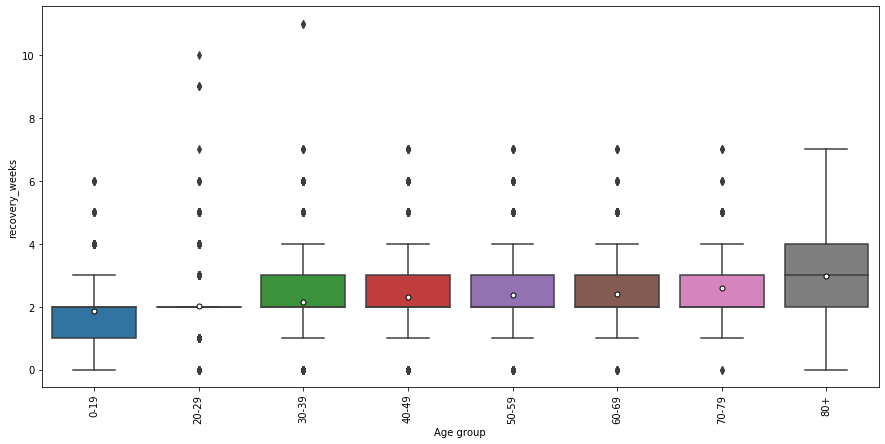

In [65]:
fig, ax = plt.subplots(figsize = (15, 7))
ax = sns.boxplot(x = data_pivot['Age group'], y = data_pivot['recovery_weeks'], showmeans=True, 
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"5"},
                order = ['0-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+'])
plt.xticks(rotation=90)



In [115]:
# make data frames for each age group
df_0 = data_pivot[data_pivot['Age group'] == '0-19']
df_20 = data_pivot[data_pivot['Age group'] == '20-29']
df_30 = data_pivot[data_pivot['Age group'] == '30-39']
df_40 = data_pivot[data_pivot['Age group'] == '40-49']
df_50 = data_pivot[data_pivot['Age group'] == '50-59']
df_60 = data_pivot[data_pivot['Age group'] == '60-69']
df_70 = data_pivot[data_pivot['Age group'] == '70-79']
df_80 = data_pivot[data_pivot['Age group'] == '80+']
df_list = [df_0, df_20, df_30, df_40, df_50, df_60, df_70, df_80]
print([len(i) for i in df_list])

[9282, 19527, 18193, 18217, 17810, 11573, 8475, 18384]


In [124]:
df_list1 = [i[symptom_colnames] for i in df_list]
df_list1 = [i.dropna(subset=['Symptom, weakness'],axis=0) for i in df_list1]
print([len(i) for i in df_list1])

[426, 869, 1004, 985, 1092, 841, 522, 443]


In [125]:
lengths = [(i.shape[0] - i.isnull().sum())/i.shape[0] * 100 for i in df_list1]
lengths[0]

Case information
Symptom, chills                  90.375587
Symptom, cough                   94.131455
Symptom, diarrhea                90.845070
Symptom, fever                   91.784038
Symptom, headache                94.131455
Symptom, irritability            89.201878
Symptom, nausea                  90.610329
Symptom, other                   55.868545
Symptom, pain                    93.427230
Symptom, runny nose              93.427230
Symptom, shortness of breath     86.619718
Symptom, sore throat             92.957746
Symptom, weakness               100.000000
dtype: float64

In [126]:
df_list1 = [i.drop(columns = ['Symptom, other'], axis = 1) for i in df_list1]


In [ ]:
def create_dummy_df(df, cat_cols, dummy_na):
    
    ''' function to dummy categorical variables
    inputs:
    - df (dataframe): datframe containing categorical variables 
    - cat_cols (list): a list of column names from the data frame that contain categorical 
    data that you want to dummy
    - dummy_na (boolean): True or False value indicating whether you would like a separate
    column for NA values
    
    returns:
    - a dataframe where all of the columns listed in cat_cols have been dummied'''
    
    for col in  cat_cols:
        try:
            # for each cat var add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

cat_df = df_clean.select_dtypes(include=['object'])
cat_cols_lst = cat_df.columns

df_new = create_dummy_df(df_clean, cat_cols_lst, dummy_na=False) 

y = df_new['age']
X = df_new.drop(['age'], axis = 1)  